In [9]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the data into a Pandas DataFrame
df= pd.read_csv(
    "../Resources/global_food_wastage_dataset.csv",
    index_col="Country")

# Display sample data
df.head(10)

,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
Country,,,,,,,
Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
India,2024,Fruits & Vegetables,11962.89,11196.04,136.21,1311.91,37.09
Germany,2024,Prepared Food,45038.72,39191.25,179.27,1349.45,68.93
China,2019,Fruits & Vegetables,12791.20,12233.28,90.80,1229.29,59.90
UK,2019,Meat & Seafood,14795.65,14346.97,128.91,450.33,59.01


In [3]:
df.info()
#No Null values-no need for imputation 
#Food Category is a string-May need encoding

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, Australia to France
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5000 non-null   int64  
 1   Food Category              5000 non-null   object 
 2   Total Waste (Tons)         5000 non-null   float64
 3   Economic Loss (Million $)  5000 non-null   float64
 4   Avg Waste per Capita (Kg)  5000 non-null   float64
 5   Population (Million)       5000 non-null   float64
 6   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 312.5+ KB


In [4]:
# Generate summary statistics
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [5]:
#Going to need a scalar

In [ ]:
sns.pairplot(data=df)
plt.show()

In [ ]:
#Look at Economic loss and total waste, strong correlation

In [7]:
df.columns

Index(['Year', 'Food Category', 'Total Waste (Tons)',
       'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
       'Population (Million)', 'Household Waste (%)'],
      dtype='object')

In [10]:
num_cols = ['Total Waste (Tons)',
       'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
       'Population (Million)', 'Household Waste (%)']

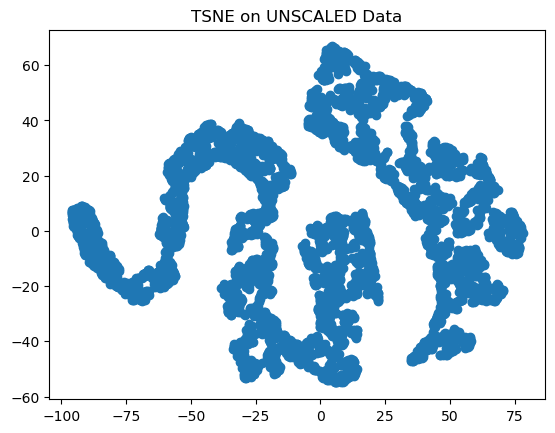

In [11]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df.loc[:, num_cols])) # fit UNSCALED data

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on UNSCALED Data")
plt.show()

In [12]:
#standard Scalar 
# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])

# Transform the Data
df_scaled = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols)
df_scaled

,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,-0.406717,-0.434580,-0.708165,-1.537905,0.308676
1,-1.484503,-1.412240,1.599429,1.111495,-1.677518
2,-1.078486,-1.103413,1.106829,0.744097,-0.170839
3,1.491039,1.061068,0.206554,0.612273,-1.565401
4,0.564094,0.816834,-0.090971,0.990950,-1.207489
...,...,...,...,...,...
4995,1.577046,1.574598,-0.617271,0.946205,-0.890975
4996,0.510818,0.524351,1.634670,1.564482,1.273743
4997,-0.310370,-0.174732,-1.702801,-1.715443,-1.624047
4998,0.105651,0.295364,1.688398,0.943001,1.715311


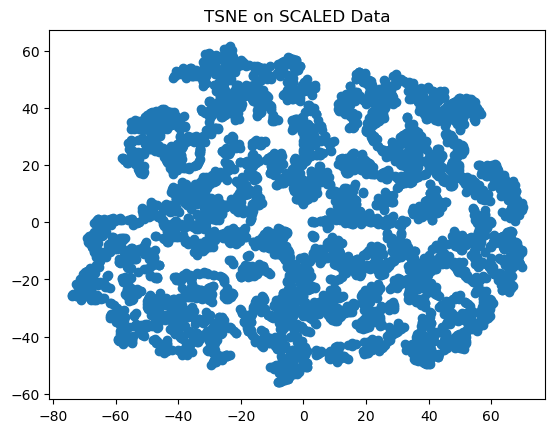

In [13]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on SCALED Data")
plt.show()

In [14]:
# Correlations
corrs = df_scaled.corr()
corrs

,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
Total Waste (Tons),1.000000,0.974522,0.019987,0.024048,0.010367
Economic Loss (Million $),0.974522,1.000000,0.017097,0.022253,0.006167
Avg Waste per Capita (Kg),0.019987,0.017097,1.000000,-0.029190,-0.019394
Population (Million),0.024048,0.022253,-0.029190,1.000000,-0.004848
Household Waste (%),0.010367,0.006167,-0.019394,-0.004848,1.000000


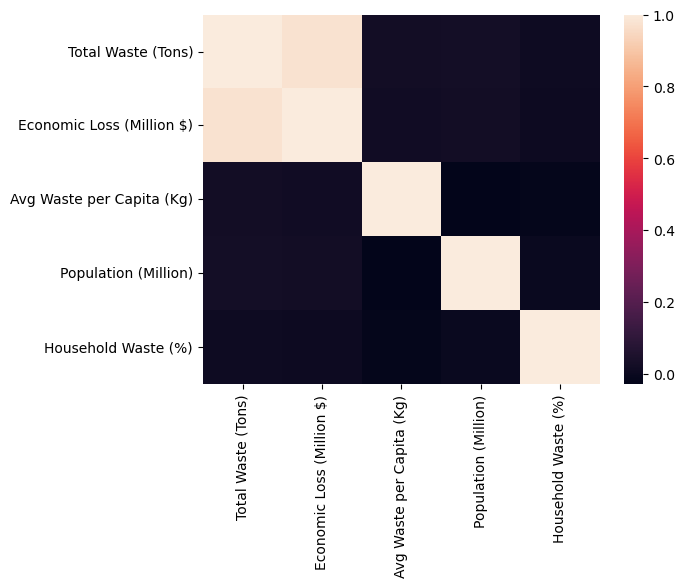

In [15]:
sns.heatmap(corrs)
plt.show()

## Unsupervised Clustering

In [16]:
# Do Unsupervised Clustering

# KMeans on SCALED (not PCA) DATA

# Define your "X" - features to predict
X = df_scaled

In [17]:
# Create a a list to store inertia values and the values of k
inertia = []
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,inertia,s_score,vrc_scores
0,2,17619.936509,0.260802,2093.414480
1,3,15552.183782,0.204138,1517.840169
2,4,14106.799424,0.194157,1285.963367
3,5,12449.695112,0.187935,1258.851138
4,6,11424.273864,0.191455,1186.910901
5,7,10258.997756,0.204029,1195.733525
6,8,9409.401036,0.214282,1181.627585
7,9,8887.383674,0.205563,1131.076760
8,10,8415.680432,0.206409,1092.621570
9,11,7889.429433,0.206676,1082.025569


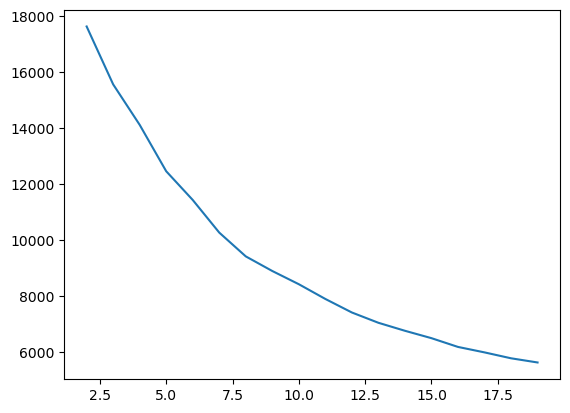

In [18]:
plt.plot(df_metrics.k, df_metrics.inertia)
plt.show()

## Agglomerative Clustering

In [19]:
# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.236701,1846.261572
1,3,0.177960,1341.472209
2,4,0.136581,1111.650906
3,5,0.124903,991.274664
4,6,0.123644,934.329107
5,7,0.128129,908.604603
6,8,0.119528,857.793349
7,9,0.116444,825.699433
8,10,0.114724,805.867004
9,11,0.113542,795.094225


In [20]:
#BIRCH
# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    model = Birch(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.238027,1863.740046
1,3,0.168166,1233.263855
2,4,0.137751,1103.248794
3,5,0.135784,1004.385814
4,6,0.133370,956.231421
5,7,0.125250,888.440321
6,8,0.126800,844.353406
7,9,0.123169,824.050678
8,10,0.133023,828.333896
9,11,0.133917,809.349738


## Visualize the best model

In [23]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=7, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub['clusters'] = preds

df_sub.head()

,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),clusters
0,-0.406717,-0.434580,-0.708165,-1.537905,0.308676,3
1,-1.484503,-1.412240,1.599429,1.111495,-1.677518,5
2,-1.078486,-1.103413,1.106829,0.744097,-0.170839,2
3,1.491039,1.061068,0.206554,0.612273,-1.565401,6
4,0.564094,0.816834,-0.090971,0.990950,-1.207489,6


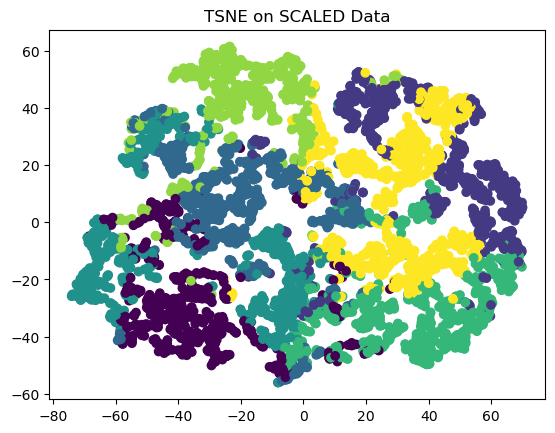

In [24]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on SCALED Data")
plt.show()

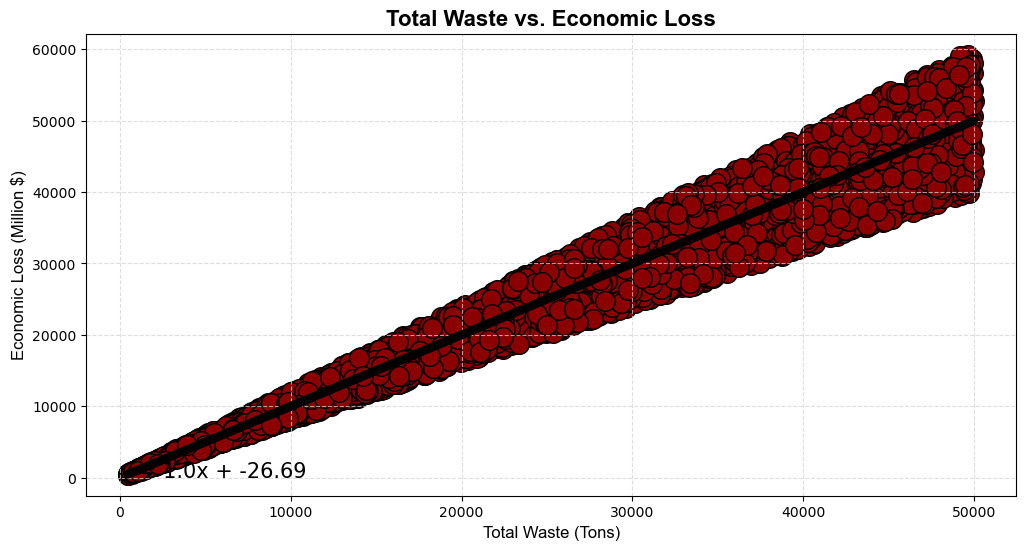

In [17]:
# make a scatter plot

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot

plt.scatter(df["Total Waste (Tons)"] , df["Economic Loss (Million $)"], color="darkred", edgecolor="black", s=200)
plt.plot(df["Total Waste (Tons)"], regress_values, color="black", linewidth=6) # the regression line

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Total Waste (Tons)", fontfamily="Arial", fontsize=12)
plt.ylabel("Economic Loss (Million $)", fontfamily="Arial", fontsize=12)
plt.title("Total Waste vs. Economic Loss", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
#plt.ylim(10, 16)
#plt.xlim(0, 14)

plt.annotate(line_eq, (10, 11), fontsize=15, color="black")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [11]:
# Add the linear regression equation and line to plot
x_values = df["Total Waste (Tons)"]
y_values = df["Economic Loss (Million $)"]

# do regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept # these are the points/predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 1.0x + -26.69
